### I am going to back-test strategies of forecasting FX returns on a rolling basis.
### I'll back-test two strategies, one based on Model Selection Method A, and the other based on Method B.

In [1]:
import pandas as pd
import numpy as np

In [2]:
FX_Prices = pd.read_excel('FX.xlsx',sheet_name='FX_Prices',skiprows=1)
FX_Prices

,Dates,EURUSD,Unnamed: 2,Dates.1,GBPUSD,Unnamed: 5,Dates.2,JPYUSD,Unnamed: 8,Dates.3,AUDUSD,Unnamed: 11,Dates.4,CADUSD,Unnamed: 14,Dates.5,NOKUSD,Unnamed: 17,Dates.6,CHFUSD
0,2019-03-29,1.1254,NaN,2019-03-29,1.3182,NaN,2019-03-29,0.009077,NaN,2019-03-29,0.7090,NaN,2019-03-29,0.7456,NaN,2019-03-29,0.1159,NaN,2019-03-29,1.0050
1,2019-02-28,1.1371,NaN,2019-02-28,1.3263,NaN,2019-02-28,0.008978,NaN,2019-02-28,0.7094,NaN,2019-02-28,0.7589,NaN,2019-02-28,0.1168,NaN,2019-02-28,1.0020
2,2019-01-31,1.1448,NaN,2019-01-31,1.3109,NaN,2019-01-31,0.009186,NaN,2019-01-31,0.7273,NaN,2019-01-31,0.7619,NaN,2019-01-31,0.1186,NaN,2019-01-31,1.0057
3,2018-12-31,1.1467,NaN,2018-12-31,1.2754,NaN,2018-12-31,0.009123,NaN,2018-12-31,0.7049,NaN,2018-12-31,0.7332,NaN,2018-12-31,0.1157,NaN,2018-12-31,1.0187
4,2018-11-30,1.1317,NaN,2018-11-30,1.2749,NaN,2018-11-30,0.008812,NaN,2018-11-30,0.7306,NaN,2018-11-30,0.7523,NaN,2018-11-30,0.1163,NaN,2018-11-30,1.0015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1994-08-31,1.2341,NaN,1994-08-31,1.5340,NaN,1994-08-31,0.009995,NaN,1994-08-31,0.7429,NaN,1994-08-31,0.7310,NaN,1994-08-31,0.1442,NaN,1994-08-31,0.7508
296,1994-07-29,1.2261,NaN,1994-07-29,1.5440,NaN,1994-07-29,0.009985,NaN,1994-07-29,0.7395,NaN,1994-07-29,0.7211,NaN,1994-07-29,0.1448,NaN,1994-07-29,0.7463
297,1994-06-30,1.2238,NaN,1994-06-30,1.5443,NaN,1994-06-30,0.010158,NaN,1994-06-30,0.7285,NaN,1994-06-30,0.7224,NaN,1994-06-30,0.1444,NaN,1994-06-30,0.7499
298,1994-05-31,1.1909,NaN,1994-05-31,1.5113,NaN,1994-05-31,0.009544,NaN,1994-05-31,0.7371,NaN,1994-05-31,0.7225,NaN,1994-05-31,0.1400,NaN,1994-05-31,0.7130


In [3]:
FX_Prices = FX_Prices.dropna(axis=1)
FX_Prices

,Dates,EURUSD,Dates.1,GBPUSD,Dates.2,JPYUSD,Dates.3,AUDUSD,Dates.4,CADUSD,Dates.5,NOKUSD,Dates.6,CHFUSD
0,2019-03-29,1.1254,2019-03-29,1.3182,2019-03-29,0.009077,2019-03-29,0.7090,2019-03-29,0.7456,2019-03-29,0.1159,2019-03-29,1.0050
1,2019-02-28,1.1371,2019-02-28,1.3263,2019-02-28,0.008978,2019-02-28,0.7094,2019-02-28,0.7589,2019-02-28,0.1168,2019-02-28,1.0020
2,2019-01-31,1.1448,2019-01-31,1.3109,2019-01-31,0.009186,2019-01-31,0.7273,2019-01-31,0.7619,2019-01-31,0.1186,2019-01-31,1.0057
3,2018-12-31,1.1467,2018-12-31,1.2754,2018-12-31,0.009123,2018-12-31,0.7049,2018-12-31,0.7332,2018-12-31,0.1157,2018-12-31,1.0187
4,2018-11-30,1.1317,2018-11-30,1.2749,2018-11-30,0.008812,2018-11-30,0.7306,2018-11-30,0.7523,2018-11-30,0.1163,2018-11-30,1.0015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1994-08-31,1.2341,1994-08-31,1.5340,1994-08-31,0.009995,1994-08-31,0.7429,1994-08-31,0.7310,1994-08-31,0.1442,1994-08-31,0.7508
296,1994-07-29,1.2261,1994-07-29,1.5440,1994-07-29,0.009985,1994-07-29,0.7395,1994-07-29,0.7211,1994-07-29,0.1448,1994-07-29,0.7463
297,1994-06-30,1.2238,1994-06-30,1.5443,1994-06-30,0.010158,1994-06-30,0.7285,1994-06-30,0.7224,1994-06-30,0.1444,1994-06-30,0.7499
298,1994-05-31,1.1909,1994-05-31,1.5113,1994-05-31,0.009544,1994-05-31,0.7371,1994-05-31,0.7225,1994-05-31,0.1400,1994-05-31,0.7130


In [4]:
FX_Prices = FX_Prices.iloc[::-1]
FX_Prices

,Dates,EURUSD,Dates.1,GBPUSD,Dates.2,JPYUSD,Dates.3,AUDUSD,Dates.4,CADUSD,Dates.5,NOKUSD,Dates.6,CHFUSD
299,1994-04-29,1.1840,1994-04-29,1.5185,1994-04-29,0.009833,1994-04-29,0.7155,1994-04-29,0.7231,1994-04-29,0.1395,1994-04-29,0.7125
298,1994-05-31,1.1909,1994-05-31,1.5113,1994-05-31,0.009544,1994-05-31,0.7371,1994-05-31,0.7225,1994-05-31,0.1400,1994-05-31,0.7130
297,1994-06-30,1.2238,1994-06-30,1.5443,1994-06-30,0.010158,1994-06-30,0.7285,1994-06-30,0.7224,1994-06-30,0.1444,1994-06-30,0.7499
296,1994-07-29,1.2261,1994-07-29,1.5440,1994-07-29,0.009985,1994-07-29,0.7395,1994-07-29,0.7211,1994-07-29,0.1448,1994-07-29,0.7463
295,1994-08-31,1.2341,1994-08-31,1.5340,1994-08-31,0.009995,1994-08-31,0.7429,1994-08-31,0.7310,1994-08-31,0.1442,1994-08-31,0.7508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-11-30,1.1317,2018-11-30,1.2749,2018-11-30,0.008812,2018-11-30,0.7306,2018-11-30,0.7523,2018-11-30,0.1163,2018-11-30,1.0015
3,2018-12-31,1.1467,2018-12-31,1.2754,2018-12-31,0.009123,2018-12-31,0.7049,2018-12-31,0.7332,2018-12-31,0.1157,2018-12-31,1.0187
2,2019-01-31,1.1448,2019-01-31,1.3109,2019-01-31,0.009186,2019-01-31,0.7273,2019-01-31,0.7619,2019-01-31,0.1186,2019-01-31,1.0057
1,2019-02-28,1.1371,2019-02-28,1.3263,2019-02-28,0.008978,2019-02-28,0.7094,2019-02-28,0.7589,2019-02-28,0.1168,2019-02-28,1.0020


In [5]:
FX_Prices.set_index('Dates',inplace=True)
FX_Prices

,EURUSD,Dates.1,GBPUSD,Dates.2,JPYUSD,Dates.3,AUDUSD,Dates.4,CADUSD,Dates.5,NOKUSD,Dates.6,CHFUSD
Dates,,,,,,,,,,,,,
1994-04-29,1.1840,1994-04-29,1.5185,1994-04-29,0.009833,1994-04-29,0.7155,1994-04-29,0.7231,1994-04-29,0.1395,1994-04-29,0.7125
1994-05-31,1.1909,1994-05-31,1.5113,1994-05-31,0.009544,1994-05-31,0.7371,1994-05-31,0.7225,1994-05-31,0.1400,1994-05-31,0.7130
1994-06-30,1.2238,1994-06-30,1.5443,1994-06-30,0.010158,1994-06-30,0.7285,1994-06-30,0.7224,1994-06-30,0.1444,1994-06-30,0.7499
1994-07-29,1.2261,1994-07-29,1.5440,1994-07-29,0.009985,1994-07-29,0.7395,1994-07-29,0.7211,1994-07-29,0.1448,1994-07-29,0.7463
1994-08-31,1.2341,1994-08-31,1.5340,1994-08-31,0.009995,1994-08-31,0.7429,1994-08-31,0.7310,1994-08-31,0.1442,1994-08-31,0.7508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1.1317,2018-11-30,1.2749,2018-11-30,0.008812,2018-11-30,0.7306,2018-11-30,0.7523,2018-11-30,0.1163,2018-11-30,1.0015
2018-12-31,1.1467,2018-12-31,1.2754,2018-12-31,0.009123,2018-12-31,0.7049,2018-12-31,0.7332,2018-12-31,0.1157,2018-12-31,1.0187
2019-01-31,1.1448,2019-01-31,1.3109,2019-01-31,0.009186,2019-01-31,0.7273,2019-01-31,0.7619,2019-01-31,0.1186,2019-01-31,1.0057


In [6]:
FX_Prices = FX_Prices.drop(columns=['Dates.1','Dates.2','Dates.3','Dates.4','Dates.5','Dates.6'])
FX_Prices

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-04-29,1.1840,1.5185,0.009833,0.7155,0.7231,0.1395,0.7125
1994-05-31,1.1909,1.5113,0.009544,0.7371,0.7225,0.1400,0.7130
1994-06-30,1.2238,1.5443,0.010158,0.7285,0.7224,0.1444,0.7499
1994-07-29,1.2261,1.5440,0.009985,0.7395,0.7211,0.1448,0.7463
1994-08-31,1.2341,1.5340,0.009995,0.7429,0.7310,0.1442,0.7508
...,...,...,...,...,...,...,...
2018-11-30,1.1317,1.2749,0.008812,0.7306,0.7523,0.1163,1.0015
2018-12-31,1.1467,1.2754,0.009123,0.7049,0.7332,0.1157,1.0187
2019-01-31,1.1448,1.3109,0.009186,0.7273,0.7619,0.1186,1.0057


### Step1: Transform currency prices to monthly returns.

In [7]:
FX_Returns = FX_Prices.pct_change()
FX_Returns

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
1994-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-05-31,0.005828,-0.004742,-0.029391,0.030189,-0.000830,0.003584,0.000702
1994-06-30,0.027626,0.021836,0.064334,-0.011667,-0.000138,0.031429,0.051753
1994-07-29,0.001879,-0.000194,-0.017031,0.015100,-0.001800,0.002770,-0.004801
1994-08-31,0.006525,-0.006477,0.001002,0.004598,0.013729,-0.004144,0.006030
...,...,...,...,...,...,...,...
2018-11-30,0.000442,-0.001332,-0.004631,0.032942,-0.010132,-0.018565,0.009882
2018-12-31,0.013254,0.000392,0.035293,-0.035177,-0.025389,-0.005159,0.017174
2019-01-31,-0.001657,0.027834,0.006906,0.031778,0.039143,0.025065,-0.012761


In [8]:
FX_Returns.dropna(inplace=True)

In [9]:
FX_Returns.loc['1999-12-31',:]

EURUSD   -0.003071
GBPUSD    0.012577
JPYUSD   -0.003473
AUDUSD    0.033197
CADUSD    0.019160
NOKUSD    0.005645
CHFUSD   -0.002697
Name: 1999-12-31 00:00:00, dtype: float64

In [10]:
EUR = pd.DataFrame(FX_Returns['EURUSD'])
GBP = pd.DataFrame(FX_Returns['GBPUSD'])
JPY = pd.DataFrame(FX_Returns['JPYUSD'])
AUD = pd.DataFrame(FX_Returns['AUDUSD'])
CAD = pd.DataFrame(FX_Returns['CADUSD'])
NOK = pd.DataFrame(FX_Returns['NOKUSD'])
CHF = pd.DataFrame(FX_Returns['CHFUSD'])

### Step2: starting from 12/31/1999, at each month-end date, I'll forecast next-month returns for the seven currencies separately 

In [11]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error

### Model Selection Method A (In-Sample):

In [12]:
def ForecastARorMA(data):
    predict_result = np.zeros(len(data)-24)
    for i in range(len(data)-24):
        data1 = data.iloc[i:i+24]
        AR1 = ARMA(data1,(1,0),freq='BM').fit()
        MA1 = ARMA(data1,(0,1),freq='BM').fit()
        # ARAIC = AR1.aic
        
        AR1prd = AR1.predict(data1.index[0],data1.index[-1],dynamic=False)
        MA1prd = MA1.predict(data1.index[0],data1.index[-1],dynamic=False)
        
        test_score1 = mean_squared_error(data1,AR1prd)
        test_score2 = mean_squared_error(data1,MA1prd)
        res = 0
        if test_score1>test_score2:
            res = MA1.predict(data.index[i+24],dynamic=False)
        else:
            res = AR1.predict(data.index[i+24],dynamic=False)
        predict_result[i] = res
    return predict_result

In [13]:
EURPred = ForecastARorMA(EUR['1998-01-30':])
GBPPred = ForecastARorMA(GBP['1998-01-30':])
JPYPred = ForecastARorMA(JPY['1998-01-30':])
AUDPred = ForecastARorMA(AUD['1998-01-30':])
CADPred = ForecastARorMA(CAD['1998-01-30':])
NOKPred = ForecastARorMA(NOK['1998-01-30':])
CHFPred = ForecastARorMA(CHF['1998-01-30':])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

In [14]:
InsampleRes = pd.DataFrame([EURPred,GBPPred,JPYPred,AUDPred,CADPred,NOKPred,CHFPred])
InsampleRes = InsampleRes.T
InsampleRes.columns=['EURPred','GBPPred','JPYPred','AUDPred','CADPred','NOKPred','CHFPred']
InsampleRes.index=EUR['1998-01-30':].index[24:]

In [15]:
InsampleRes

,EURPred,GBPPred,JPYPred,AUDPred,CADPred,NOKPred,CHFPred
Dates,,,,,,,
2000-01-31,-0.003131,-0.001858,0.014124,-0.000595,-0.002344,0.011939,-0.003192
2000-02-29,-0.006137,-0.000819,0.018341,-0.000382,0.000340,0.012523,-0.007582
2000-03-31,-0.004628,0.009065,0.012377,-0.002184,-0.000579,0.002050,-0.005109
2000-04-28,-0.004501,-0.001630,-0.000458,-0.002368,-0.000798,-0.000776,-0.002774
2000-05-31,-0.011437,0.007824,0.027002,-0.002033,0.000620,0.007167,-0.008398
...,...,...,...,...,...,...,...
2018-11-30,-0.003151,0.010656,-0.001926,-0.005594,-0.001367,0.002645,0.000012
2018-12-31,0.002632,0.002070,0.001336,-0.000985,-0.000446,0.001262,0.000492
2019-01-31,0.005300,0.001749,0.001517,-0.000071,-0.004193,0.000369,0.001042


### Model Selection Method B (Out-Sample):

In [16]:
EUR

,EURUSD
Dates,
1994-05-31,0.005828
1994-06-30,0.027626
1994-07-29,0.001879
1994-08-31,0.006525
1994-09-30,0.017827
...,...
2018-11-30,0.000442
2018-12-31,0.013254
2019-01-31,-0.001657


In [17]:
def Forecastoutsample(data):
    predict_result = np.zeros(len(data)-36)
    for i in range(len(data)-36):
        data_need = data.iloc[i:i+36,:]
        predict_ar = np.zeros(12)
        predict_ma = np.zeros(12)
        for j in range(12):
            data_train = data_need.iloc[j:j+24,:]
            AR1 = ARMA(data_train,(1,0),freq='BM').fit()
            MA1 = ARMA(data_train,(0,1),freq='BM').fit()
            AR1prd = AR1.predict(data_need.index[j+24],dynamic=False)
            MA1prd = MA1.predict(data_need.index[j+24],dynamic=False)
            predict_ar[j] = AR1prd
            predict_ma[j] = MA1prd
        test_score1 = mean_squared_error(data_need.iloc[24:,:],predict_ar)
        test_score2 = mean_squared_error(data_need.iloc[24:,:],predict_ma)
        res = 0
        if test_score1>=test_score2:
            model = ARMA(data_need.iloc[12:,:],(0,1),freq='BM').fit()
            res = model.predict(data.index[i+36],dynamic=False)
        else:
            model = ARMA(data_need.iloc[12:,:],(1,0),freq='BM').fit()
            res = model.predict(data.index[i+36],dynamic=False)
        predict_result[i] = res
    return predict_result

In [18]:
outEURPred = Forecastoutsample(EUR['1997-01-31':])
outGBPPred = Forecastoutsample(GBP['1997-01-31':])
outJPYPred = Forecastoutsample(JPY['1997-01-31':])
outAUDPred = Forecastoutsample(AUD['1997-01-31':])
outCADPred = Forecastoutsample(CAD['1997-01-31':])
outNOKPred = Forecastoutsample(NOK['1997-01-31':])
outCHFPred = Forecastoutsample(CHF['1997-01-31':])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Applications/anaconda3/li

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization f

In [19]:
OutsampleRes = pd.DataFrame([outEURPred,outGBPPred,outJPYPred,outAUDPred,outCADPred,outNOKPred,outCHFPred])
OutsampleRes = OutsampleRes.T
OutsampleRes.columns=['outEURPred','outGBPPred','outJPYPred','outAUDPred','outCADPred','outNOKPred','outCHFPred']
OutsampleRes.index=EUR['1997-01-31':].index[36:]

In [20]:
OutsampleRes

,outEURPred,outGBPPred,outJPYPred,outAUDPred,outCADPred,outNOKPred,outCHFPred
Dates,,,,,,,
2000-01-31,-0.003022,-0.005389,0.012898,-0.000065,-0.002057,-0.006123,-0.003192
2000-02-29,-0.005529,-0.000007,0.014642,-0.000583,0.000287,0.009027,-0.007582
2000-03-31,-0.004428,0.006833,0.010626,-0.002631,-0.000590,-0.002736,-0.005109
2000-04-28,-0.004393,-0.005841,0.003849,-0.002691,-0.000777,-0.002713,-0.002774
2000-05-31,-0.010242,0.007824,0.020417,-0.002566,0.000268,0.007167,-0.008398
...,...,...,...,...,...,...,...
2018-11-30,-0.003151,0.010656,-0.001926,-0.004398,-0.001367,0.001452,-0.000205
2018-12-31,0.002632,0.002620,0.001336,-0.000718,-0.000446,0.000841,0.000503
2019-01-31,0.005300,0.001979,0.001517,-0.000180,-0.004193,0.000369,0.001274


### Step3:

In [21]:
from scipy.optimize import minimize

In [22]:
insamplesign = np.sign(InsampleRes)
insamplesign

,EURPred,GBPPred,JPYPred,AUDPred,CADPred,NOKPred,CHFPred
Dates,,,,,,,
2000-01-31,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2000-02-29,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2000-03-31,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
2000-04-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2000-05-31,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...
2018-11-30,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
2018-12-31,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
2019-01-31,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0


In [23]:
insamplesign.columns=['EURUSD','GBPUSD','JPYUSD','AUDUSD','CADUSD','NOKUSD','CHFUSD']

In [24]:
FX_data = FX_Returns.loc['1995-01-30':]
weight = np.zeros((231,7))
for i in range(len(FX_data)-60):
    cov_data = FX_data.iloc[i:i+60,:]*insamplesign.iloc[i,:]
    cov = np.cov(cov_data.T)*12
    
    def vol(w):
        return np.sqrt(np.dot(w.T,np.dot(cov,w)))
    bnds = tuple((0,1) for x in range(7))
    cons = ({'type':'eq','fun':lambda x:np.sum(x)-1})
    optimal = minimize(vol,7*[1./7,],method='SLSQP',bounds=bnds,constraints=cons)
    sigma = vol(optimal['x'])
    we = optimal['x']*(0.05/sigma)
    weight[i] = we

In [25]:
weight

array([[8.12418393e-01, 9.07312794e-02, 1.27579354e-01, ...,
        7.28060594e-01, 9.12796181e-01, 1.39842997e-01],
       [7.83910935e-01, 2.73462949e-02, 1.51981793e-01, ...,
        3.39601466e-01, 7.53547996e-01, 4.82747635e-02],
       [1.04249479e+00, 3.93985269e-01, 1.10770593e-01, ...,
        5.87884280e-01, 8.94064840e-01, 6.79981660e-02],
       ...,
       [2.96469434e-01, 2.28412474e-01, 1.40906930e-01, ...,
        5.07536611e-01, 3.27541740e-01, 5.76821039e-03],
       [4.44538810e-01, 3.97195546e-01, 1.13920298e-01, ...,
        3.54963219e-01, 2.14260193e-01, 3.17322375e-01],
       [3.91356700e-01, 3.17902445e-01, 1.52009687e-01, ...,
        5.62326869e-01, 4.76648190e-01, 2.45926539e-18]])

In [26]:
weight_res = pd.DataFrame(weight,columns=FX_Returns.columns,index=EUR['1997-01-31':].index[36:])
weight_res

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,8.124184e-01,0.090731,0.127579,0.137863,0.728061,9.127962e-01,1.398430e-01
2000-02-29,7.839109e-01,0.027346,0.151982,0.360349,0.339601,7.535480e-01,4.827476e-02
2000-03-31,1.042495e+00,0.393985,0.110771,0.185911,0.587884,8.940648e-01,6.799817e-02
2000-04-28,4.622235e-18,0.327884,0.017151,0.006540,0.899904,2.388559e-18,1.884852e-01
2000-05-31,9.379088e-01,0.478273,0.122281,0.377826,0.370834,7.165337e-01,5.804838e-17
...,...,...,...,...,...,...,...
2018-11-30,6.852759e-01,0.296033,0.106244,0.201389,0.190840,5.355638e-01,3.126603e-01
2018-12-31,3.155263e-01,0.231586,0.178811,0.336292,0.516450,3.160572e-01,8.217048e-19
2019-01-31,2.964694e-01,0.228412,0.140907,0.316323,0.507537,3.275417e-01,5.768210e-03


In [27]:
outsamplesign = np.sign(OutsampleRes)
outsamplesign

,outEURPred,outGBPPred,outJPYPred,outAUDPred,outCADPred,outNOKPred,outCHFPred
Dates,,,,,,,
2000-01-31,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2000-02-29,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2000-03-31,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
2000-04-28,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2000-05-31,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...
2018-11-30,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
2018-12-31,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
2019-01-31,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0


In [28]:
outsamplesign.columns = ['EURUSD','GBPUSD','JPYUSD','AUDUSD','CADUSD','NOKUSD','CHFUSD']

In [29]:
weight_out = np.zeros((231,7))
for i in range(len(FX_data)-60):
    cov_data = FX_data.iloc[i:i+60,:]*outsamplesign.iloc[i,:]
    cov = np.cov(cov_data.T)
    cov = cov*12
    def vol(w):
        return np.sqrt(np.dot(w.T,np.dot(cov,w)))
    bnds = tuple((0,1) for x in range(7))
    cons = ({'type':'eq','fun':lambda x:np.sum(x)-1})
    optimal = minimize(vol,7*[1./7,],method='SLSQP',bounds=bnds,constraints=cons)
    sigma = vol(optimal['x'])
    we = optimal['x']*(0.05/sigma)
    weight_out[i] = we

In [30]:
weight_out

array([[0.00000000e+00, 3.17066380e-01, 1.83849636e-01, ...,
        7.51155756e-01, 1.25346318e-17, 2.56499819e-01],
       [7.83910935e-01, 2.73462949e-02, 1.51981793e-01, ...,
        3.39601466e-01, 7.53547996e-01, 4.82747635e-02],
       [3.61307857e-01, 5.35398098e-01, 1.44733949e-01, ...,
        5.17531483e-01, 6.52767378e-18, 1.77719115e-01],
       ...,
       [2.96469434e-01, 2.28412474e-01, 1.40906930e-01, ...,
        5.07536611e-01, 3.27541740e-01, 5.76821039e-03],
       [4.44538810e-01, 3.97195546e-01, 1.13920298e-01, ...,
        3.54963219e-01, 2.14260193e-01, 3.17322375e-01],
       [2.71530993e-01, 2.11741071e-01, 1.37880686e-01, ...,
        3.44362032e-01, 7.73111789e-01, 2.04484152e-01]])

In [31]:
weight_out_res = pd.DataFrame(weight_out,columns=FX_Returns.columns,index=EUR['1997-01-31':].index[36:])
weight_out_res

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,0.000000,0.317066,0.183850,0.083240,0.751156,1.253463e-17,2.564998e-01
2000-02-29,0.783911,0.027346,0.151982,0.360349,0.339601,7.535480e-01,4.827476e-02
2000-03-31,0.361308,0.535398,0.144734,0.144783,0.517531,6.527674e-18,1.777191e-01
2000-04-28,0.000000,0.314570,0.170893,0.053939,0.784744,0.000000e+00,2.799722e-01
2000-05-31,0.937909,0.478273,0.122281,0.377826,0.370834,7.165337e-01,5.804838e-17
...,...,...,...,...,...,...,...
2018-11-30,0.512350,0.321964,0.000000,0.119776,0.389018,6.626398e-01,2.357037e-01
2018-12-31,0.315526,0.231586,0.178811,0.336292,0.516450,3.160572e-01,8.217048e-19
2019-01-31,0.296469,0.228412,0.140907,0.316323,0.507537,3.275417e-01,5.768210e-03


In [32]:
act_returns = FX_Returns.loc['2000':]
act_returns

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,-0.035281,-0.001236,-0.045310,-0.029998,-0.001157,-0.036889,-0.040401
2000-02-29,-0.006696,-0.022893,-0.026415,-0.030141,-0.001593,-0.007494,-0.004641
2000-03-31,-0.009023,0.007535,0.072902,-0.017320,0.000870,-0.009228,0.000000
2000-04-28,-0.045631,-0.025014,-0.049856,-0.038214,-0.021008,-0.053345,-0.029642
2000-05-31,0.028622,-0.032167,0.004977,-0.019524,-0.011100,0.006261,0.021452
...,...,...,...,...,...,...,...
2018-11-30,0.000442,-0.001332,-0.004631,0.032942,-0.010132,-0.018565,0.009882
2018-12-31,0.013254,0.000392,0.035293,-0.035177,-0.025389,-0.005159,0.017174
2019-01-31,-0.001657,0.027834,0.006906,0.031778,0.039143,0.025065,-0.012761


### Step 4:

In [33]:
InsamplePortRets = act_returns*weight_res*insamplesign
InsamplePortRets

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,2.866314e-02,0.000112,-0.005781,0.004136,0.000842,-3.367171e-02,5.649773e-03
2000-02-29,5.249223e-03,0.000626,-0.004015,0.010861,-0.000541,-5.646904e-03,2.240500e-04
2000-03-31,9.406456e-03,0.002969,0.008075,0.003220,-0.000512,-8.250598e-03,-0.000000e+00
2000-04-28,2.109152e-19,0.008202,0.000855,0.000250,0.018906,1.274168e-19,5.587071e-03
2000-05-31,-2.684441e-02,-0.015384,0.000609,0.007377,-0.004116,4.486347e-03,-1.245246e-18
...,...,...,...,...,...,...,...
2018-11-30,-3.028978e-04,-0.000394,0.000492,-0.006634,0.001934,-9.942956e-03,3.089716e-03
2018-12-31,4.182110e-03,0.000091,0.006311,0.011830,0.013112,-1.630562e-03,1.411215e-20
2019-01-31,-4.912287e-04,0.006358,0.000973,-0.010052,-0.019867,8.209776e-03,-7.361022e-05


In [34]:
InsamplePortRets['PORTFOLIO'] = InsamplePortRets.loc[:,'EURUSD':'CHFUSD'].sum(axis=1)
InsamplePortRets

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD,PORTFOLIO
Dates,,,,,,,,
2000-01-31,2.866314e-02,0.000112,-0.005781,0.004136,0.000842,-3.367171e-02,5.649773e-03,-0.000049
2000-02-29,5.249223e-03,0.000626,-0.004015,0.010861,-0.000541,-5.646904e-03,2.240500e-04,0.006758
2000-03-31,9.406456e-03,0.002969,0.008075,0.003220,-0.000512,-8.250598e-03,-0.000000e+00,0.014908
2000-04-28,2.109152e-19,0.008202,0.000855,0.000250,0.018906,1.274168e-19,5.587071e-03,0.033799
2000-05-31,-2.684441e-02,-0.015384,0.000609,0.007377,-0.004116,4.486347e-03,-1.245246e-18,-0.033873
...,...,...,...,...,...,...,...,...
2018-11-30,-3.028978e-04,-0.000394,0.000492,-0.006634,0.001934,-9.942956e-03,3.089716e-03,-0.011759
2018-12-31,4.182110e-03,0.000091,0.006311,0.011830,0.013112,-1.630562e-03,1.411215e-20,0.033895
2019-01-31,-4.912287e-04,0.006358,0.000973,-0.010052,-0.019867,8.209776e-03,-7.361022e-05,-0.014943


In [35]:
OutsamplePortRets = act_returns*weight_out_res*outsamplesign
OutsamplePortRets

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD
Dates,,,,,,,
2000-01-31,0.000000,0.000392,-0.008330,0.002497,0.000869,4.623842e-19,1.036280e-02
2000-02-29,0.005249,0.000626,-0.004015,0.010861,-0.000541,-5.646904e-03,2.240500e-04
2000-03-31,0.003260,0.004034,0.010551,0.002508,-0.000450,6.023860e-20,-0.000000e+00
2000-04-28,0.000000,0.007869,-0.008520,0.002061,0.016486,0.000000e+00,8.298927e-03
2000-05-31,-0.026844,-0.015384,0.000609,0.007377,-0.004116,4.486347e-03,-1.245246e-18
...,...,...,...,...,...,...,...
2018-11-30,-0.000226,-0.000429,0.000000,-0.003946,0.003941,-1.230217e-02,-2.329229e-03
2018-12-31,0.004182,0.000091,0.006311,0.011830,0.013112,-1.630562e-03,1.411215e-20
2019-01-31,-0.000491,0.006358,0.000973,-0.010052,-0.019867,8.209776e-03,-7.361022e-05


In [36]:
OutsamplePortRets['PORTFOLIO'] = OutsamplePortRets.loc[:,'EURUSD':'CHFUSD'].sum(axis=1)
OutsamplePortRets

,EURUSD,GBPUSD,JPYUSD,AUDUSD,CADUSD,NOKUSD,CHFUSD,PORTFOLIO
Dates,,,,,,,,
2000-01-31,0.000000,0.000392,-0.008330,0.002497,0.000869,4.623842e-19,1.036280e-02,0.005791
2000-02-29,0.005249,0.000626,-0.004015,0.010861,-0.000541,-5.646904e-03,2.240500e-04,0.006758
2000-03-31,0.003260,0.004034,0.010551,0.002508,-0.000450,6.023860e-20,-0.000000e+00,0.019903
2000-04-28,0.000000,0.007869,-0.008520,0.002061,0.016486,0.000000e+00,8.298927e-03,0.026195
2000-05-31,-0.026844,-0.015384,0.000609,0.007377,-0.004116,4.486347e-03,-1.245246e-18,-0.033873
...,...,...,...,...,...,...,...,...
2018-11-30,-0.000226,-0.000429,0.000000,-0.003946,0.003941,-1.230217e-02,-2.329229e-03,-0.015291
2018-12-31,0.004182,0.000091,0.006311,0.011830,0.013112,-1.630562e-03,1.411215e-20,0.033895
2019-01-31,-0.000491,0.006358,0.000973,-0.010052,-0.019867,8.209776e-03,-7.361022e-05,-0.014943


In [37]:
stats_in = InsamplePortRets['PORTFOLIO'].describe()
stats_in['Sharpe ratio'] = stats_in['mean']/stats_in['std']*np.sqrt(12)
print('The In-sample annualized return is '+str(stats_in['mean']*12))
print('The In-sample annualized volatility is '+str(stats_in['std']*np.sqrt(12)))
print('The In-sample Sharpe ratio is '+str(stats_in['Sharpe ratio']))

The In-sample annualized return is 0.007540777766368471
The In-sample annualized volatility is 0.07134607809875246
The In-sample Sharpe ratio is 0.10569295422140836


In [38]:
stats_out = OutsamplePortRets['PORTFOLIO'].describe()
stats_out['Sharpe ratio'] = stats_out['mean']/stats_out['std']*np.sqrt(12)
print('The out-sample annualized return is '+str(stats_out['mean']*12))
print('The out-sample annualized volatility is '+str(stats_out['std']*np.sqrt(12)))
print('The out-sample Sharpe ratio is '+str(stats_out['Sharpe ratio']))

The out-sample annualized return is 0.013110343146983814
The out-sample annualized volatility is 0.06472131887208171
The out-sample Sharpe ratio is 0.20256606903971963


In [39]:
import matplotlib.pyplot as plt

In [40]:
InsamplePortRets['value'] = (1+InsamplePortRets['PORTFOLIO']).cumprod()

Text(0.5, 1.0, 'In-sample Result')

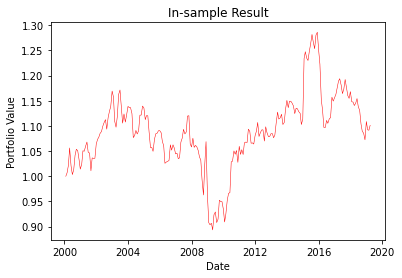

In [41]:
plt.plot(InsamplePortRets['value'],color = 'r',linewidth = 0.5)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('In-sample Result')

In [42]:
OutsamplePortRets['value'] = (1+OutsamplePortRets['PORTFOLIO']).cumprod()

Text(0.5, 1.0, 'Out-sample Result')

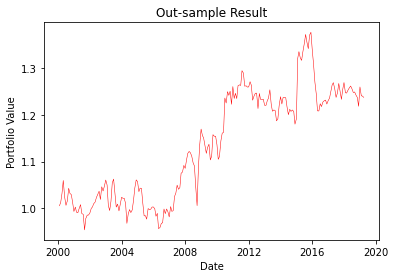

In [43]:
plt.plot(OutsamplePortRets['value'],color = 'r',linewidth = 0.5)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Out-sample Result')

Overall, the two methods both perform not very good, but the out-sample method performs better. It also has higher Sharpe ratio.